In [32]:
import pandas as pd
import torch
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df_train='/kaggle/input/human-intervention-detection-on-tracks/train/images'

In [54]:
c1=cv2.imread("/kaggle/input/human-intervention-detection-on-tracks/train/images/IMG-20240516-WA0015_jpg.rf.6d7a7c03562018cdbe34ed349ba8e399.jpg")
c2=cv2.resize(c,(556,556))
c1.shape
plt.imshow(c1)
plt.show()

In [20]:
img_data=[]
da=[]
for file in os.listdir(df_train):
    data=os.path.join(df_train,file)
    da.append(data)
    cv=cv2.imread(data)
    if cv is not None:
        data_resize=cv2.resize(cv,(556,556))
        img_data.append(data_resize)


In [33]:
img_arr=np.array(img_data)

In [44]:
# img_arr[1]

In [46]:
img_arr[1]=img_arr[1]/556.0

In [55]:
# cv2.imshow(img_arr[1])

In [47]:
plt.imshow(img_arr[1])
plt.show()

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


/opt/conda/lib/python3.10/site-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 632.9 kB/s eta 0:00:000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.0/872.0 kB 6.5 MB/s eta 0:00:00a 0:00:01
requirements: Ultralytics requirement ['pillow>=10.3.0'] not found, attempting AutoUpdate...


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.9.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 17.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0

requirements: AutoUpdate success ✅ 17.1s, installed 1 package: ['pillow>=10.3.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-9-3 Python-3.10.14 torch-2.4.0+cpu CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 126MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [59]:
result=model(img_arr[20])

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


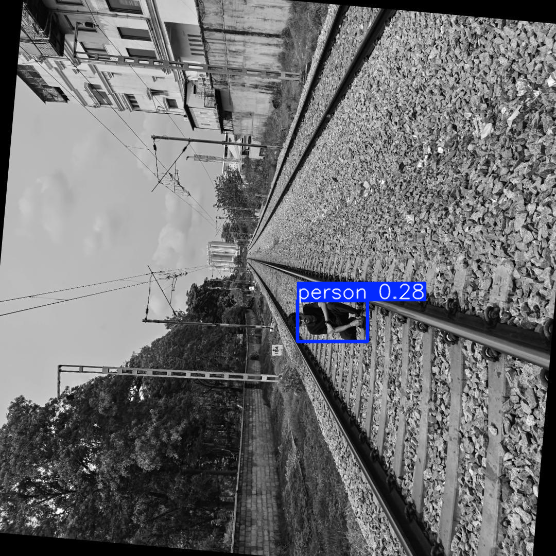

In [60]:
result.show()